### <center>Univariate/Multivariate Gaussian Distributions & Their Properties</center>


### <center>Univariate Normal Distributions</center>

The normal distribution (Gaussain Distribution) is defined by two parameters: mean $ \mu $, which is the expected value of the distribution and standard deviation $ \sigma $, which corresponds to the expected squared deviation from the mean. Mean, $ \mu $ controls the Gaussian's center position and the standard deviation controls the shape of the distribution. The square of the standard deviation is referred to as the variance $ \sigma^{2} $. The entire distribution is denoted as $\N(\mu,\sigma^{2}) $.
Given the mean and variance, one can calculate the probability distribution function of nomral distributions with a normalised Gaussian function for a value $x$, the density is:

$$
P(x|\mu,\sigma^{2}) = \frac{1} {\sqrt{2\pi\sigma^{2} }} exp(-\frac{(x - \mu^{2})}{2\sigma^{2}})
$$

We'll call this distriution "univariate" as it consists of one __random__ variable.


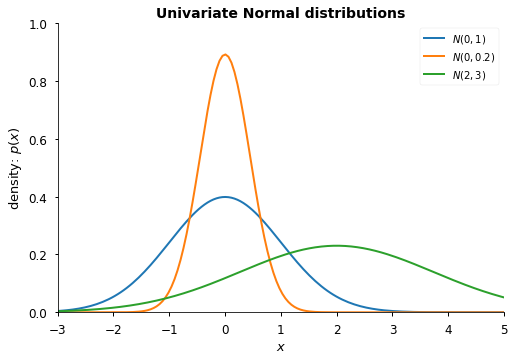

In [1]:
import numpy as np
from numpy import random, mean, sqrt, std, log, pi, exp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams["figure.figsize"] = (10, 6)
# mpl.rcParams['figure.fontsize'] = 13
plt.style.use(["seaborn-notebook", "../presentation.mplstyle"])  # jupyter version

# with plt.style.context('presentation'):
#     plt.plot([1, 2, 3, 4])
# Context Manager version


def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return (1.0 / sqrt(2 * pi * variance)) * exp(-((x - mean) ** 2) / (2 * variance))


# plotting different univariate Normals
x = np.linspace(-3, 5, num=150)

# NOTE: Create a func to make this plt code less verbose & cleaner.

plt.plot(x, univariate_normal(x, mean=0, variance=1), label="$N(0, 1)$")
plt.plot(x, univariate_normal(x, mean=0, variance=0.2), label="$N(0, 0.2)$")
plt.plot(x, univariate_normal(x, mean=2, variance=3), label="$N(2, 3)$")
plt.xlabel("$x$", fontsize=13)
plt.ylabel("density: $p(x)$", fontsize=13)
plt.title("Univariate Normal distributions")
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig = plt.subplots_adjust(bottom=0.15)
# plt.savefig("univariate_normal_distributions.png")

### <center>Multivariate Normal Distribution</center>

The multivariate normal distribution is a multidimensional generalisation of the one dimensional normal distribution. It represents the distribution of a multivariate random variable, that is made up of multiple random variables which can be correlated with each other.

Like the univariate normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $ \mu $. which is expected value of the distribution and the variance-covariance matrix $ \sum $, which measures how two random variables depend on each other and how they change together.

We denote the covariance between variables $X$ and $Y$ as $$Cov(X,Y)$$.

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
P(\mathbf{x} \mid \mu,\Sigma) = \frac{1}{\sqrt{2(\pi)^{d} \lvert \Sigma \rvert}} exp \left(- \frac{1}{2} (\mathbf{x} - \mu)^{T} \Sigma^{-1} (\mathbf{x} - \mu)\right)
$$

where $\mathbf{x}$ is a random vector of size $d$, $\mu$ is $d \times 1$ mean vector and $\Sigma$ is the (symmetric and positive definite) covariance matrix of size $d$ \times $d$ and $\lvert \Sigma \rvert$ is the determinant. We denote this multivariate normal distribution as $N(\mu, \Sigma)$.


In [2]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (
        1.0
        / (sqrt((2 * pi) ** d * np.linalg.det(covariance)))
        * exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2)
    )

Plotting a multivariate distribution of more than 2 variables may be difficult. So, lets look at an example of a bivariate normal distribution.

Assume a 2-dimensional (2-dim) random vector.

$$
\mathbf{x} = \begin{bmatrix}x_{1}\\ x_{2}\end{bmatrix}
$$

has a normal distribution $N(\mu, \Sigma)$ where

$$
\mu = \begin{bmatrix} \mu_{1} \\ \mu_{2} \end{bmatrix}
$$

and

$$
\Sigma = \begin{bmatrix}\Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22}\end{bmatrix}
$$

- If $x_{1}$ and $x_{2}$ are independent, covariance between $x_{1}$ and $x_{1}$ is set to zero, for instance,

$$
N\left(\begin{bmatrix}0\\ 1\end{bmatrix}, \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}\right)
$$

- If $x_{1}$ and $x_{2}$ are set to be different than 0, we can then say that both variables are correlated. For instance,

$$
N\left(\begin{bmatrix}0\\ 1\end{bmatrix}, \begin{bmatrix}1 & 0.8 \\ 0.8 & 1 \end{bmatrix}\right)
$$

meaning that increasing $x_{1}$ will increase the probability that $x_{2}$ will also increase.

Note: Covariance matrix must be positive definite.


In [3]:
# np.linalg.eigvals(bivariate_covariance)
# array([1.8, 0.2])

# We see that this covariance matrix is indeed positive definite (ref: The Spectral Theorem for Matrices)

Plotting a multivariate normal distribution for both cases:


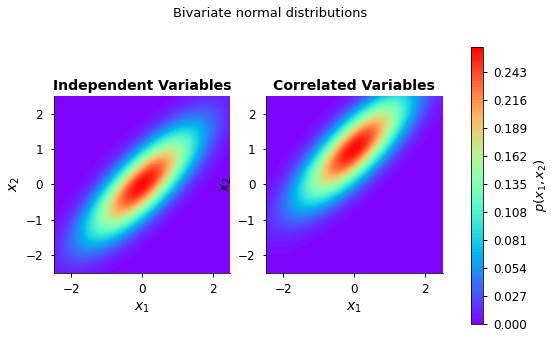

In [4]:
# using the function above: multivariate_normal()


def gen_surface(mean, covariance, d):
    """Helper function to generate density surface"""
    nb_of_x = 100  # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s)  # generate the grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # fill the cost matrix for ea combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i, j] = multivariate_normal(
                np.matrix([[x1[i, j]], [x2[i, j]]]), d, mean, covariance
            )
    return x1, x2, pdf  # x1, x2, pdf(x1, x2)


# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
d = 2  # number of dimensions


# plot independent Normals
bivariate_mean = np.matrix([[0.0], [0.0]])  # Mean
bivariate_covariance = np.matrix([[1.0, 0.8], [0.8, 1.0]])  # Covariance

x1, x2, p = gen_surface(bivariate_mean, bivariate_covariance, d)


# plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap="rainbow")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect("equal")
ax1.set_title("Independent Variables")


# plot of correlated Normals
bivariate_mean = np.matrix([[0.0], [1.0]])  # Mean
bivariate_covariance = np.matrix([[1.0, 0.8], [0.8, 1.0]])  # Covariance
x1, x2, p = gen_surface(bivariate_mean, bivariate_covariance, d)


# plot bivariate distribution for correlated Normals
con = ax2.contourf(x1, x2, p, 100, cmap="rainbow")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.axis([-2.5, 2.5, -2.5, 2.5])
ax2.set_aspect("equal")
ax2.set_title("Correlated Variables")


# add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel("$p(x_1, x_2)$", fontsize=13)
plt.suptitle("Bivariate normal distributions", fontsize=13, y=0.95)
plt.savefig("Bivariate_normal_distributions")

### <center>Affine transformation of Univariate Normal Distribution</center>

Suppose $X \sim N(\mu, \sigma^{2})$ and $a, b \in \mathbb{R}$ with $a \neq 0$. If we define an affine transformation $Y = g(X) = aX+b$, then $Y \sim \N(a\mu + b, a^{2}\sigma^{2})$, meaning that a linear combination of independent random variables are normal.

For example, if

$$
X \sim N(1, 2)
$$

$$
Y = X + 3 \Rightarrow Y \sim N(4, 2)
$$

$$
Y = 2X + 3 \Rightarrow Y \sim N(5, 8)
$$

Proving this with the transformation method,

$$
\begin{split}
F_{Y}(y) = P(Y \leq y) &= P(aX + b \leq y)\\
&= P(X \leq \frac{Y-b}{a})\\
&= \int_{-\infty}^{\frac{y-b}{a}}\frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x - \mu)^{2}}{2\sigma^{2}} \right) dx
\end{split}
$$

---

$$
\begin{split}
f_{Y}(y) &= \frac{d}{dy} \int_{-\infty}^{\frac{y-b}{a}}\frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x - \mu)^{2}}{2\sigma^{2}} \right) dx\\
&= \frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{\left(\left(\frac{y-b}{a} \right) - \mu\right)^{2}}{2\sigma^{2}} \right) \left(\frac{d}{dy}\frac{y-b}{a} \right)\\
&= \frac{1}{a\sigma \sqrt{2\pi}} exp \left(- \frac{\left(y-(a\mu +b)\right)^{2}}{2a^{2}\sigma^{2}} \right)\\
\end{split}
$$

and then simply so $Y =  \sim N(a\mu + b, a^{2}\sigma^{2})$.


### <center>Affine transformation of Multivariate Normal Functions</center>

It is possible to transform a multivariate normal distribution into a new normal distribution, using an affine transformation. Specifically, if $X$ is normally distributed and $Y = LX + u$ with $L$ being a linear transformation and $u$ being a vector, then $y$ is also normally distributed with mean $\mu_{Y} = u + L \mu_{X}$ and covariance matrix $\Sigma_{Y} = L \Sigma_{X} L^{T}$.

$$
\begin{split}
Y \sim N(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim N(\mu_{X}, \Sigma_{X}) \\
N(\mu_{Y}, \Sigma_{Y}) = N(u + L\mu_{X}, L\Sigma_{X}L^T) = LN(\mu_{X}, L\Sigma_{X}) + u
\end{split}
$$


This can be proven as follows:

$$
\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u
$$

$$
\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}
$$


### <center>Sampling from a Multivariate Normal Distribution</center>

Previous formula helps us to sample from any multivariate Gaussian distribution.
In order to do this, sample $X$ from $ N(0, I*{d})$ where mean is the vector $\mu = 0$ and the variance-covariance matrix is the identity matrix $\Sigma*{X} = I_{d}$ (standard multivariate normal distribution). Sampling from this distribution is easier because each variable in $X$ is independent from all other variables, we can just sample each variable separately.

Its then possible to sample $Y$ from $N(\mu_{Y}, \Sigma{Y})$ by sampling $X$ and applying the affine transformation on said samples. This transform is $Y = LX + u$ where we know the covariance of Y is $\Sigma_{Y} = L \Sigma{X} L^{T}$. Since $\Sigma_{X} = I_{d}$, we can write $\Sigma_{Y} = L \Sigma_{X} L^{T} = L I_{d} L^{T} = L L^{T}$. $L$ can be found by a technique called Cholesky decomposition. The vector $u$ is then $\mu_{Y}$ since $\mu_{X} = 0$ ($u = \mu_{Y} - L \mu_{X}$).


Try sampling 50 samples from:

$$
Y
\sim
N\left(
\begin{bmatrix} 0 \\
1
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.


In [5]:
# Sample from:
d = 2  # number of random samples
mean = np.matrix([[0.0], [1.0]])
covariance = np.matrix([[1, 0.8], [0.8, 1]])

# create L
L = np.linalg.cholesky(covariance)
print(L)

[[1.  0. ]
 [0.8 0.6]]


In [6]:
n = 50  # sampels to draw
X = np.random.normal(size=(d, n))
print(X)
print(f"-------------------------------------------")
print(np.shape(X))

[[ 1.22257443 -1.05425927 -0.82335218  2.17669306  0.59750762 -0.37071177
  -0.58228915  0.25990034 -0.66047163  0.90453553 -0.16365056  1.39533272
  -0.77679178  0.7127864   0.91613225  1.45887433 -1.34344963  0.54405412
  -0.72843818 -1.16220458  1.10485507  0.09579964  0.81159226 -0.94646247
   0.02174139  0.50088116  0.67828756  1.4247121  -0.01401544 -0.74197683
   0.50716832  0.16951132 -1.5960079  -0.39767954 -0.53828376  1.07598605
   1.72308131  1.06586842 -0.11164092  1.11026973 -0.26617994 -0.73053943
   0.60691167 -0.32426042 -0.79421977  0.24451109  0.410856   -0.54193208
   0.16001444 -0.70961084]
 [ 1.31024843 -0.89871849 -2.17805174  0.95324101  0.74844888  2.11357918
  -0.57531879 -0.05276108 -1.64858068  0.1572141   0.86367019 -0.46439802
  -0.07008826  1.09073293 -0.34710661 -0.75380182 -0.06178823  0.41548197
   2.25842212 -0.04948591  1.2286806  -1.19424181  1.74328482 -1.2139409
  -0.70491425  0.49102332  0.21751953  0.22128725  0.79932199 -0.34898223
  -1.0083510

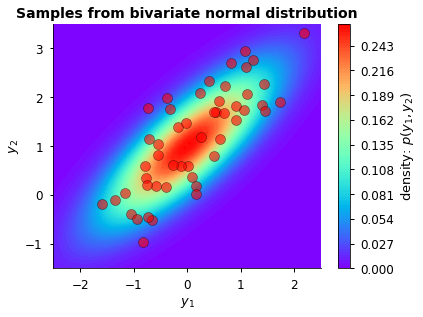

In [7]:
Y = L.dot(X) + mean


# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = gen_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap="rainbow")
# Plot samples
ax.plot(Y[0, :], Y[1, :], "ro", alpha=0.6, markeredgecolor="k", markeredgewidth=0.5)
ax.set_xlabel("$y_1$", fontsize=13)
ax.set_ylabel("$y_2$", fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect("auto")
ax.set_title("Samples from bivariate normal distribution")
cbar = plt.colorbar(con)
cbar.ax.set_ylabel("density: $p(y_1, y_2)$", fontsize=13)
plt.savefig("sampling_from_multivariate_normal_distribution")

## <center>Marginal Normal Distributions</center>

If both $\mathbf{x}$ and $\mathbf{y}$ are jointly normal random vectors defined as:

$$
\begin{bmatrix}
\mathbf{x} \\
\mathbf{y}
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\mathbf{x}} \\
\mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
A & C \\
C^T & B
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma)
, \qquad
\Sigma^{-1} = \Lambda =
\begin{bmatrix}
\tilde{A} & \tilde{C} \\
\tilde{C}^T & \tilde{B}
\end{bmatrix}
$$


A marginal distribution is the distribution of a subset of random variables from the original distribution. It represents the probabilities or densities of the variables in the subset without reference to the other values in the original distribution.

In our case of the 2D multivariate normal the marginal distibutions are the univariate distributions of each component $\mathbf{x}$ and $\mathbf{y}$ seperately. They are defined as:

$$
\begin{split}
p(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, A) \\
p(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, B)
\end{split}
$$


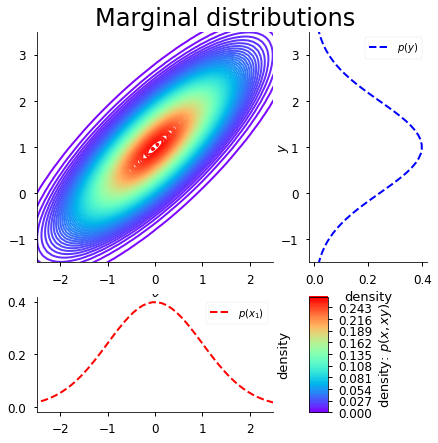

In [8]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

d = 2
mean = np.matrix([[0.0], [1.0]])
cov = np.matrix([[1, 0.8], [0.8, 1]])

# Getting mean values from the vectors
mu_x = mean[0, 0]
mu_y = mean[1, 0]

# get the blocks (single values in this case) from the cov matrix
A = cov[0, 0]
B = cov[1, 1]
C = cov[0, 1]  # C transpose in this case

# plotting bivariate distribution
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace =0., hspace = 0.)
plt.suptitle("Marginal distributions", y=0.93)

# plot surface top left
ax1 = plt.subplot(gs[0])
x, y, p = gen_surface(mean, cov, d)

con = ax1.contour(x, y, p, 100, cmap="rainbow")
ax1.set_xlabel("$x$", fontsize=13)
ax1.set_ylabel("$y$", fontsize=13)
ax1.yaxis.set_label_position("right")
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mu_y, A)
# plot univariate distribution
ax2.plot(py, y, "b--", label=f"$p(y)$")
ax2.legend(loc=0)
ax2.set_xlabel("density", fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mu_x, B)
# Plot univariate distribution
ax3.plot(x, px, "r--", label=f"$p(x_1)$")
ax3.legend(loc=0)
ax3.set_ylabel("density", fontsize=13)
ax3.yaxis.set_label_position("right")
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("left", size="20%", pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel("density: $p(x, xy)$", fontsize=13)
plt.savefig("marginal_normal_distributions")

## <center>What are the Different types of Covariance Matrices?</center>

Couple of examples of covariance structures that could be specified for multivariate Gaussian distributions.


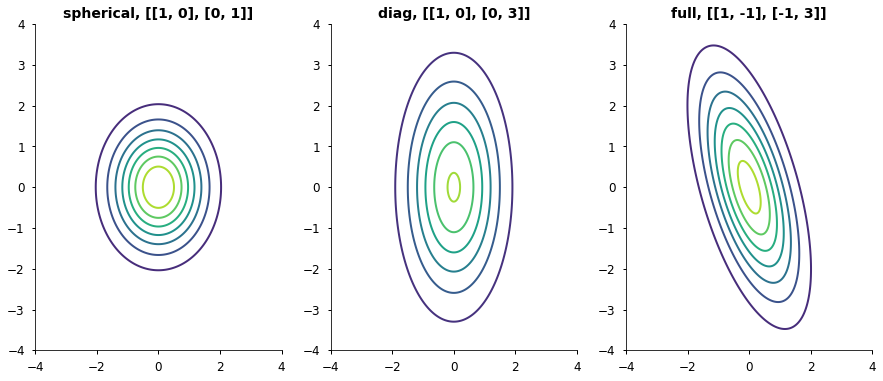

In [9]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-4:4:0.01, -4:4:0.01]
position = np.empty(x.shape + (2,))
position[:, :, 0] = x
position[:, :, 1] = y

# different values for the covariance matrix
covariances = [[[1, 0], [0, 1]], [[1, 0], [0, 3]], [[1, -1], [-1, 3]]]
titles = ["spherical", "diag", "full"]

plt.figure(figsize=(15, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    z = multivariate_normal([0, 0], covariances[i]).pdf(position)
    plt.contour(x, y, z)
    plt.title("{}, {}".format(titles[i], covariances[i]))
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])

plt.show()

One way to view a gaussian distribution in two dimensions is via a contour plot (see above). The coloring represents the regions intensity, or how high it was in probability.

In the plot above, the center area that has dark red color is the region of highest probability, while the blue area corresponds to a low probability.

The first plot is refered to as a Spherical Gaussian, since the probability distribution has spherical (circular) symmetry. The covariance matrix is a diagonal covariance with equal elements along the diagonal. By specifying a diagonal covariance, what we're seeing is that there's no correlation between our two random variables, because the off-diagonal correlations takes the value of 0. You can simply interpret it as there is no linear relationship exists between variables. However, note that this does not necessarily mean that they are independent. Furthermore, by having equal values of the variances along the diagonal, we end up with a circular shape to the distribution because we are saying that the spread along each one of these two dimensions is exactly the same.

In contrast, the middle plot's covariance matrix is also a diagonal one, but we can see that if we were to specify different variances along the diagonal, then the spread in each of these dimensions is different and so what we end up with are these axis-aligned ellipses. This is refered to as a Diagonal Gaussian.

Finally, we have the full Gaussian distribution. A full covariance matrix allows for correlation between the two random variables (non-zero off-diagonal value) we can provide these non-axis aligned ellipses. So in this example that we're showing here, these two variables are negatively correlated, meaning if one variable is high, it's more likely that the other value is low.


## <center>Maximum Likelihood Estimation for Univariate Gaussian Distributions</center>

Given the assumption that observations from the sample are i.i.d., the likelihood function can be written as:

$$
\begin{split}
L(\mu, \sigma^{2}; x_{1}, x_{2}, \ldots, x_{n}) &= \prod_{i=1}^{n} f_{X}(x_{i} ; \mu , \sigma^{2})\\
&= \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x_{i} - \mu)^{2}}{2\sigma^{2}} \right)\\
&= \left(2\pi \sigma^{2} \right)^{-n/2} exp \left(-\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}(x_{i} - \mu)^{2} \right)\\
\end{split}
$$

The log-likelihood function is

$$
l(\mu, \sigma^{2}; x_{1}, x_{2}, \ldots , x_{n}) = \frac{-n}{2}ln(2\pi) -\frac{n}{2} ln(\sigma^{2})-\frac{1}{2\sigma^{2}}\sum_{i=1}^{n}(x_{i} - \mu)^{2}
$$

If we take first-order partial derivatives of the log-likelihood function with respect to the mean $\mu$ and variance $\sigma^{2}$ and set the equations zero and solve them, we will have the maximum likelihood estimators of the mean and the variance, which are:

$$
\mu_{MLE} = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

and

$$
\sigma_{MLE}^{2} = \frac{1}{n} \sum_{i=1}^{n} \left(x_{i} - \mu_{MLE}\right)^{2}
$$

respectively. Thus, the estimator $\mu_{MLE}$ is equal to the sample mean and the estimator $\sigma_{MLE}^{2}$ is equal to the unadjusted sample variance.

### <center>Maximum Likelihood Estimation for Multivariate Gaussian Distribution</center>

The maximum likelihood estimators of the mean $\mu$ and the variance $\Sigma$ for multivariate normal distribution are found similarly and are as follows:

$$
\mu_{MLE} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_{i}
$$

and

$$
\Sigma_{MLE} = \frac{1}{n} \sum_{i=1}^{n} \left(\mathbf{x}_{i} - \mu_{MLE}\right) \left(\mathbf{x}_{i} - \mu_{MLE}\right)^{T}
$$



---

---


---

---


## <center>Generating Random Variables</center>


Consider how to take the transformation of a random variable _X_ with cumulative distribution function $ F_X(x) $. Let $ Y = t(X) $, that is, _Y_ is the transformation of _X_ via function $ t(.) $.
In order to get the CDF of _Y_ we use the definition of CDFs:

$$
F_Y(y) = P(Y\le y) = P(t(X)\le y)
$$

We have $F_X(x)$ and want to know how to compute $F_Y(y)$ in terms of $F_X(x)$. To get where we can take the inverse of $t(x)$ on both sides of the inequiality.

$$
F_Y(y) = P(Y\le y) = P(t(X)\le y) = P(t(X) \le t^{-1}(y))
$$

This is the CDF of X:

$$
P(X \le t^{-1}(y)) = F_X(t^{-1}(y))
$$

and thats how we get $F_Y(y)$ in terms of $F_X(x)$. We can compute the density function $f_Y(y)$ by differentiating $F_Y(y)$, applying the chain rule:

$$
f_Y(y) = f_y(t^{-1}(y)) \times \frac{d}{dy} t^{-1}(y) dy
$$

Note that it's only this simple if $t(x)$ is one-to-one and strictly monotone increasing; it gets more complicated to reason about the regions where $Y$ is defined otherwise.

Let $U \sim U(0, 1)$. Then $F(X) = U$ means that the random variable $F^{-1}(U)$ has the same distribution as $X$.


<center>Inverse Transform Sampling</center>



It is a basic method for pseudo-random number sampling, i.e. for generating sample numbers at random from any probability distribution given its cumulative distribution function. The basic principle is to find the inverse function of $F$, $F^{-1}$ such that $F F^{-1} = F^{-1} F = I$.

The problem that the inverse transform sampling method solves is as follows:

- Let $X$ be a random variable whose distribution can be described by the cumulative distribtuion function $F_X$.
- We want to generate values of $X$ which are distributed according to this distribution.

The inverse transform sampling method works as follows:

- Generate a random number $u$ from the standard uniform distribution in the interval $[0, 1]$, e.g. $U \sim Unif [0, 1]$.
- Find the inverse of the desired CDF, e.g. $F^{-1}_X(x)$. Inverse cumulative distribution function is also called a quantile function.
- Compute $x = F^{-1}_X(u)$ (Solve equation $F_X(x) = u$ for $X$). The computed random variable $X$ has distribution $F_X(x)$.

Expressed differently, given a continuous uniform variable $U$ in $[0, 1]$ and an invertible cumulative distribution function $F_X$, the random variable $X = F^{-1}_X(U)$ has distribution $F_X$ (or, $X$ is distributed $F_X$).

$$
\begin{split}
F_{X}(x) = P(X \leq x) &= P(F_{X}^{-1}(U)\leq x)\\
&=P(U \leq F_{X}(x))\\
&= F_{U}(F_{X}(x))\\
&= F_{X}(x)
\end{split}
$$


Remember that the cumulative distribution function of continuous uniform distribution on the interval $[0, 1]$ is $F_{U}(u) = u$.

Computationally, this method involves computing the quantile function of the distribution -- in other words, computing the CDF of the distribution (which maps a number in the domain to a probability between 0 and 1) and then inverting that function many times. This is the source of the term "inverse"/"inversion" in most of the names for this method. Note that for a discrete distribution, computing the CDF isnt in general too difficult. We simply add up the individual probabilities for the various points of the distribution.
For a continuous distribution, however, we need to integrate the probability density function (PDF) of the distribution, which is _impossible_ to do analytically for the distributions (including the normal distribution). As a result, this method may be computationally inefficient for many distributions and other methods are preferred; however, it is a useful method for building more generally applicable samplers such as those based on rejection sampling.

For the normal distribution, the lack of an analytical expression for the corresponding quantile function means that other methods (e.g. the Box-Muller transform) may be preferred computationally. It is often the case that, even for simple distributions, the inverse transform sampling method can be improved on.

(Note: technically this only works when the CDF has a closed form inverse function)

[//]: ![](./../../../Desktop/Diff_Distributions_CDF_Inverses.png)

![](https://github.com/mmuratarat/mmuratarat.github.io/blob/master/_posts/images/Screen%20Shot%202019-10-06%20at%2019.45.52.png?raw=true)


## <center>Continuous Example: Exponential Distribution</center>

The exponential distribution has CDF:

$$
F_{X}(x) = 1 - e^{- \lambda x}
$$

for $x \geq 0$ (and $0$ otherwise). By solving $u=F(X)$ we obtain the inverse function

$$
\begin{split}
1 - e^{-\lambda x} &= u\\
x &= \frac{-1}{\lambda}ln(1 - y)
\end{split}
$$

so

$$
F^{-1}_X(x) = \frac{-1}{\lambda}ln(1 - u)
$$

It means that if we draw some $u$ from $U \sim Unif(0, 1)$ and compute $x = F^{-1}_X(x) = \frac{-1}{\lambda}ln(1 - u)$, this $X$ has exponential distribution.
Note: In practice, since both $u$ AND $1-u$ are uniformly distributed random numbers, the calculation can be simplified as:

$$
x = F^{-1}_X(x) = \frac{-1}{\lambda}ln(u)
$$


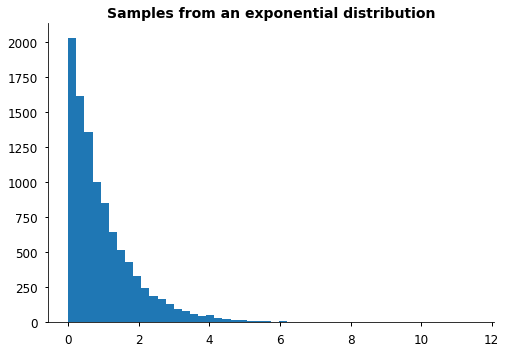

In [10]:
def inverse_exp_dis(lmbda=1.0):
    return (-1 / lmbda) * log(1 - random.random())


plt.hist([inverse_exp_dis() for i in range(10_000)], 50)
plt.title("Samples from an exponential distribution")
plt.savefig("inverse_pdf_exp_distribution", format="svg")

# plt.show()

# # savefig doesnt work with show()

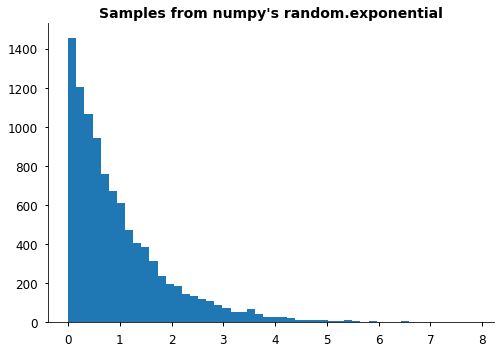

In [11]:
plt.hist([random.exponential() for i in range(10_000)], 50)
plt.title("Samples from numpy's random.exponential")
plt.savefig("np_random_exponential_dist", format="svg")
# plt.show()

## Functions with no inverses

In general, there are no inverses for functions that can return the same values for different inputs. Density functions (ex. standard normal density function is symmetric, thus it returns the same value for -2 and 2, etc). An interesting example is the normal distribtuion, it is one of the examples of cumulative distribution functions that dont have a closed-form inverse. Not every cumulative distribution function has to have a closed-form inverse!! Therefore, the inverse transform method isn't efficient.


## Normal Distribution

There isn't any closed form expression for the inverse cdf of a normal distribution (the quantile function of a normal dist), as previously mentioned. This is often a problem with the inverse transform method. There are various ways to express the function and numerous approximations.

Thinking of a standard normal distribution, the drawback of phing inverse CDF methods are that it relies on calculation of the probit function $\Phi^{-1}$, which can't be done analytically (Note: in probability theory & statistics, the probit function is the quantile function associated with the standard normal distribution, which is commonly denoted by $N(0,1)$). Some approximate methods are described in literature. One of the easiest ways is to do a table lookup. Example: $U = 0.975$, then $Z = \Phi^{-1}(U) = 1.96$ because the z-table gives $\Phi(Z)$.

![](https://github.com/mmuratarat/mmuratarat.github.io/blob/master/_posts/images/z_table.png?raw=true)


If you're willing to accept numeric solution, inverse functions can be found. One of the inverse CDF of the standard normal distribution was proposed by Schmeiser:

$$
Z = \Phi^{-1}(U) \approx \frac{U^{0.135} - (1 - U)^{0.135}} {0.1975}
$$

for $0.0013499 \le U \le 0.9986501$ which matches the true normal distribution with a single digit after the decimal point.

There is one another approximation.. with an absolute error $\leq 0.45 \times 10^{−3}$:

$$
Z = sign(U − 1/2) \left(t - \frac{c_{0} + c_{1}t + c_{2} t^{2}}{1 + d_{1}t + d_{2} t^{2} + d_{3}t^{3}} \right)
$$

where sign(x) = 1, 0, −1 if $X$ is positive, zero, or negative, respectively;

$$
t = \left\{- \ln \left[min (U, 1-U) \right]^{2} \right\}^{1/2}
$$

and $c_{0} = 2.515517, c_{1} = 0.802853, c_{2} = 0.010328, d_{1} = 1.432788, d_{2} = 0.189269, d_{3} = 0.001308$.

In any case, rather than sampling x directly, simply sample $Z \sim N(0, 1)$ and transform the samples of $Z$ into samples of $X$. If $Z \sim N(0, 1)$ and you want $X \sim N(\mu, \sigma^{2})$, just take $X \leftarrow \mu + \sigma Z$. Suppose you want to generate $X \sim N(3, 16)$, and you start with $U = 0.59$. Then,

$$
X = \mu + \sigma Z = 3 + 4 \Phi^{-1}(0.59) = 3 + 4(0.2275) = 3.91
$$

because $\Phi^{-1}(0.59) = Z \rightarrow \Phi(Z) = P(Z \leq Z) = 0.59$. What is this $Z$? Using a [online calculator](https://stattrek.com/online-calculator/normal), it is $0.2275$.


In [28]:
import seaborn as sns


3.030023654621789
4.016778114955294


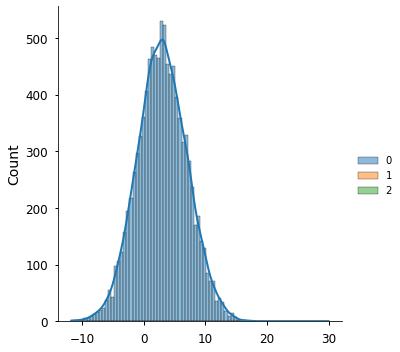

In [38]:
## REDO THIS CELL
n = 10_000
mean = 3
variance = 16
Z = np.random.normal(loc=0, scale=1.0, size=(n,))
X = mean + (np.sqrt(variance) * Z)

# print(f"mu = {mean(X)}")
print(np.mean(X))

# print(f"std = {std(X)}")
print(np.std(X))

# count, bins, ignored = plt.hist(X, 30, normed = True)
bins = 30
# count = plt.hist(X, bins)
# count= sns.displot((X, bins),)
# count, bins, ignored = plt.hist(X, 

sns.displot(data=(X, bins, univariate_normal(bins, mean, variance)), kde = True)

plt.plot(bins, univariate_normal(bins, mean, variance), linewidth=2, color="r")
# plt.savefig("generated_normal_distribution", format="svg")
plt.show()

<center>Box-Muller Method</center>

Consider a more direct & exact transformation w/ the BM Method. Let $Z_{1}$ and $Z_{2}$ be two standard normal random variables. Plotting the two as apoint in the plane, represented in a polar coordinate system as $Z_{1}$  = $B \cos\theta$ and $Z_{2}$ = $B \sin\theta$.

It's known that $B^{2}$ = $Z_{1}^{2} + Z_{2}^{2}$ has the chi-square distribution with 2 degrees of freedom, which is equivalent to an exponential distribution with mean 2. This comes from the fact that if one has k i.i.d normal random variables where $X_i$ $\sim$ $N(0, \sigma^{2})$, sum of squares of those random variables, $X_{1}^{2}$ + $X_{2}^{2}$ + ... + $X_{k}^{2}$ $\sim$ $\sigma^{2}X_{k}^{2}$:

$Y = $ \lambda$ $e^{\neg\lambda t}$, t \greaterthan \zero$